# Signal-detection-AUROC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# define parameters
num_samples = 1000

# define means and standard deviations of example distributions
dist_mu = np.array([1.5, 2])
dist_sigma = np.array([0.5, 0.2])


In [3]:
# create distributions
x = np.linspace(0,4,100)

dist1 = np.random.normal(size=[num_samples], loc=dist_mu[0], scale=dist_sigma[0])
dist2 = np.random.normal(size=[num_samples], loc=dist_mu[1], scale=dist_sigma[1])

# concatenate
dists = np.concatenate((dist1[:,np.newaxis],dist2[:,np.newaxis]), axis=1)

print(np.shape(dist1))
print(np.shape(dists))

# get analytic distributions
dist1_analytic = stats.norm(loc=dist_mu[0], scale=dist_sigma[0]).pdf(x)
dist2_analytic = stats.norm(loc=dist_mu[1], scale=dist_sigma[1]).pdf(x)

(1000,)
(1000, 2)


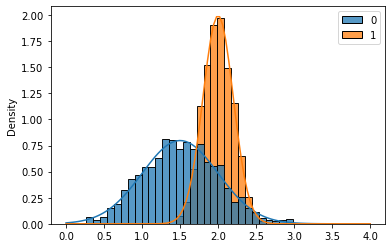

In [4]:
# plot
sns.histplot(
    dists,
    stat='density',
    multiple='layer',
    common_norm=False)
# Plot the analytic distribution on top
sns.lineplot(x=x, y=dist1_analytic)
sns.lineplot(x=x, y=dist2_analytic)
plt.show()

In [5]:
# define AUROC function
def AUROC(data, classidx):
    # AUROC(data, classidx)
    #
    # Compute area under receiver operating characteristic curve
    #
    # Parameters
    # ----------
    # data : numpy array of floats
    #   vector containing a set of samples
    # classidx : numpy array of int
    #   vector with membership of each data point in the class 0 or 1 (binary only)
    #
    # Returns
    # -------
    # area : float
    #   float indicating area under receiver operating characteristic curve
    # hit : numpy array of floats
    #   array with proportion of hits at varying thresholds
    # fa : numpy array of floats
    #   array with proportion of false alarms at varying thresholds
    # 
     
    # check input
    num_samples = np.shape(data)[0];
    
    assert np.shape(data)[0] == np.shape(classidx)[0], 'data and class labels should have the same shape'
    assert np.all((classidx==0) | (classidx==1)), 'class labels should be either 0 or 1'
    
    # sort data, class
    sort_idx = np.argsort(data,axis=0)
    sort_data = data[sort_idx]
    sort_class = classidx[sort_idx]
    
    # init
    hit = np.zeros([num_samples])
    fa = np.zeros([num_samples])
    
    # get number of samples per class
    num_samples1 = np.sum(sort_class==1)
    num_samples2 = np.sum(sort_class==0)
    
    # loop over samples (thresholds) and compute proportion of hits and false alarms
    for ithresh in range(num_samples):
        hit[num_samples-ithresh-1] = np.sum(sort_class[ithresh:num_samples]==1)/num_samples1 # number of hits
        fa[num_samples-ithresh-1]  = np.sum(sort_class[ithresh:num_samples]==0)/num_samples2 # number of false alarms
    
    # area under curve
    delta_fa = np.diff(fa)
    area = np.dot(delta_fa,hit[1:])
    
    return area, hit, fa

AUROC = 0.824478


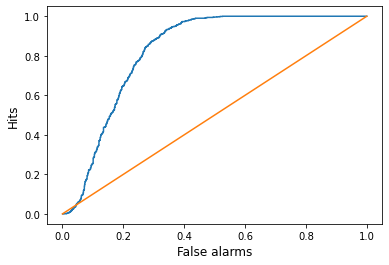

In [6]:
# make into single dimensional vector
data = np.squeeze(np.reshape(dists, (num_samples*2,1),order='F')) 

# define class membership
classidx = np.concatenate((np.zeros(num_samples),np.ones(num_samples)))

# compute AUROC
area,hit,fa = AUROC(data, classidx)

# print and plot
print(f'AUROC = {area}')

plt.plot(fa,hit)
plt.plot([0, 1], [0, 1])
plt.xlabel("False alarms", size = 12) 
plt.ylabel("Hits", size = 12) 
plt.show()
